# Exercise - Student Population clustering based on country

The 'Indian_Student_Data.csv' file contains country wise distribution of student population from India. The country's latitude and longitude is also provided. We have to perform clustering to club students based on the country.

The snippet of code below plots the student data on a geographical map. The marker colors are based on the percentage values. 

### Perform the following operations (after reading and initial plotting):
1. Run the Elbow method on the dataset. (Take the latitude, longitude and percentage) as features to run the Kmeans. Find the optimum clusters required.
2. Run the Kmeans on the obtained number of clusters using 'K-means++'. Your only job is to plot the clusters color wise on the geographical map. You have to use the code snippet provided. 
3. Obtain the silhoutte co-eff value for this clustering. 

In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("./Indian_Student_Data.csv")
df.head()

,country,no_of_indian_students,percentage,latitude,longitude
0,United States of America,165918,37.134985,39.783730,-100.445882
1,Australia,66886,14.970109,-24.776109,134.755000
2,Canada,50000,11.190764,61.066692,-107.991707
3,New Zealand,32000,7.162089,-41.500083,172.834408
4,Bahrain,27000,6.043013,35.207801,72.547397


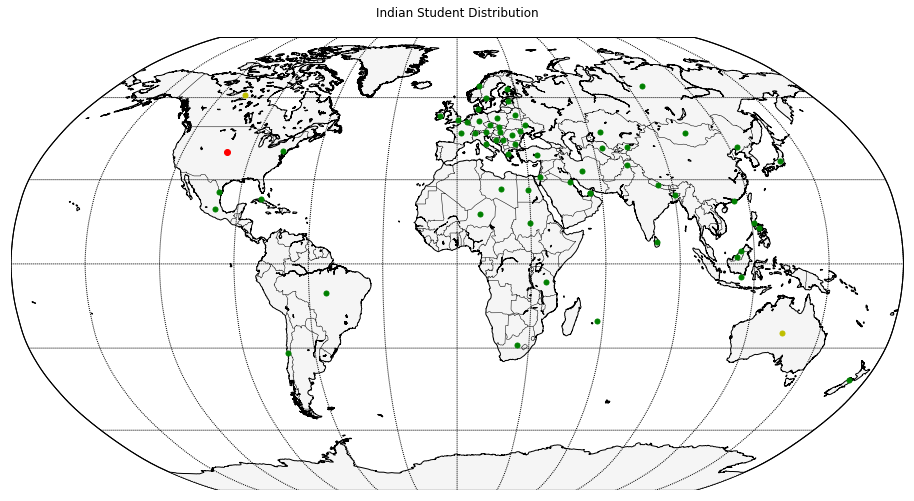

In [90]:
# --- Build Map ---
from mpl_toolkits.basemap import Basemap

def get_marker_color(magnitude):
    if magnitude < 10.0:
        return ('go')
    elif magnitude < 20.0:
        return ('yo')
    else:
        return ('ro')

# Make this plot larger.
plt.figure(figsize=(16,12))

eq_map = Basemap(projection='robin', resolution = 'l', area_thresh = 1000.0,
             lat_0=0, lon_0=0)
eq_map.drawcoastlines()
eq_map.drawcountries()
eq_map.fillcontinents(color = 'whitesmoke')
eq_map.drawmapboundary()
eq_map.drawmeridians(np.arange(0, 360, 30))
eq_map.drawparallels(np.arange(-90, 90, 30))

# min_marker_size = 2.5 
# for lon, lat, mag in zip(lons, lats, magnitudes):
for sr, row in df[["latitude","longitude","percentage"]].iterrows():
    x,y = eq_map(row.longitude, row.latitude)
    msize = int((row.percentage/20) + 5.0)
    marker_string = get_marker_color(row.percentage)
    eq_map.plot(x, y, marker_string, markersize=msize)
   
title_string = "Indian Student Distribution\n"
plt.title(title_string)

plt.show()